In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import median_absolute_error
import matplotlib.pyplot as plt



# Problem 1

In [16]:
df1 = pd.read_csv("wine.csv") 
df1.head()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality
0,1.0,3.3,2.8,3.1,4.1,9.8
1,1.0,4.4,4.9,3.5,3.9,12.6
2,1.0,3.9,5.3,4.8,4.7,11.9
3,1.0,3.9,2.6,3.1,3.6,11.1
4,1.0,5.6,5.1,5.5,5.1,13.3


In [17]:
 np.random.seed(42)
# Train-test split
train_df = df1.iloc[:30]
test_df = df1.iloc[30:]


In [5]:
X_train = train_df.drop(columns=["Quality"])
y_train = train_df["Quality"]
X_test = test_df.drop(columns=["Quality"])
y_test = test_df["Quality"]

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(max_iter=10000))])

In [11]:
param_grid = {
    'lasso__alpha': np.logspace(-1, 0, 3)
}
param_grid

{'lasso__alpha': array([0.1       , 0.31622777, 1.        ])}

In [13]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_median_absolute_error',
    cv=5
)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([0.1       , 0.31622777, 1.        ])},
             scoring='neg_median_absolute_error')

In [14]:
grid_search.fit(X_train, y_train)

# Best model details
best_lasso = grid_search.best_estimator_.named_steps['lasso']
best_features = X_train.columns[best_lasso.coef_ != 0]
best_coefficients = best_lasso.coef_[best_lasso.coef_ != 0]

# Predict and calculate Eout
y_pred_test = grid_search.predict(X_test)
eout_lasso = median_absolute_error(y_test, y_pred_test)

In [15]:
print("Selected Features:", best_features.tolist())
print("Coefficients:", best_coefficients)
print("Eout (Lasso):", eout_lasso)

Selected Features: ['Aroma', 'Flavor']
Coefficients: [0.59599902 0.83262316]
Eout (Lasso): 0.8501589701530339


#### Lasso regression identified Aroma and Flavor as the most relevant predictors, assigning them weights of 0.596 and 0.833, respectively. The model’s performance on the test data resulted in an Eout of 0.85, reflecting its generalization ability.

# Problem 2

In [18]:
df2 = pd.read_csv("siCoData.csv")
df2.head()

,x,y
0,-0.889238,-0.334713
1,0.532539,0.898156
2,0.596540,0.870667
3,-0.375349,-0.713875
4,0.083465,0.401115


In [25]:
X = df2["x"].values.reshape(-1, 1)
y = df2["y"].values.reshape(-1, 1)

In [26]:
np.random.seed(42)

# Network architecture
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01
max_epochs = 1000
tolerance = 1e-4

# Weight initialization
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [27]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Forward pass
def forward_pass(X):
    z1 = X @ W1 + b1
    a1 = tanh(z1)
    z2 = a1 @ W2 + b2
    return z1, a1, z2

# Training loop
errors = []
for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X)):
        xi = X[i].reshape(1, -1)
        yi = y[i].reshape(1, -1)

        # Forward
        z1, a1, y_pred = forward_pass(xi)

        # Error
        error = y_pred - yi
        total_error += np.abs(error).mean()

        # Backpropagation
        dW2 = a1.T @ error
        db2 = error
        d_hidden = error @ W2.T * tanh_derivative(z1)
        dW1 = xi.T @ d_hidden
        db1 = d_hidden

        # Weight update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    avg_error = total_error / len(X)
    errors.append(avg_error)
    if avg_error < tolerance:
        break

In [32]:
_, _, y_pred_all = forward_pass(X)
Ein = np.mean(np.abs(y_pred_all - y))

# Output
print("Final In-sample Error (Ein):", Ein)
print("Total Epochs:", epoch + 1)


Final In-sample Error (Ein): 0.08022703963547895
Total Epochs: 1000


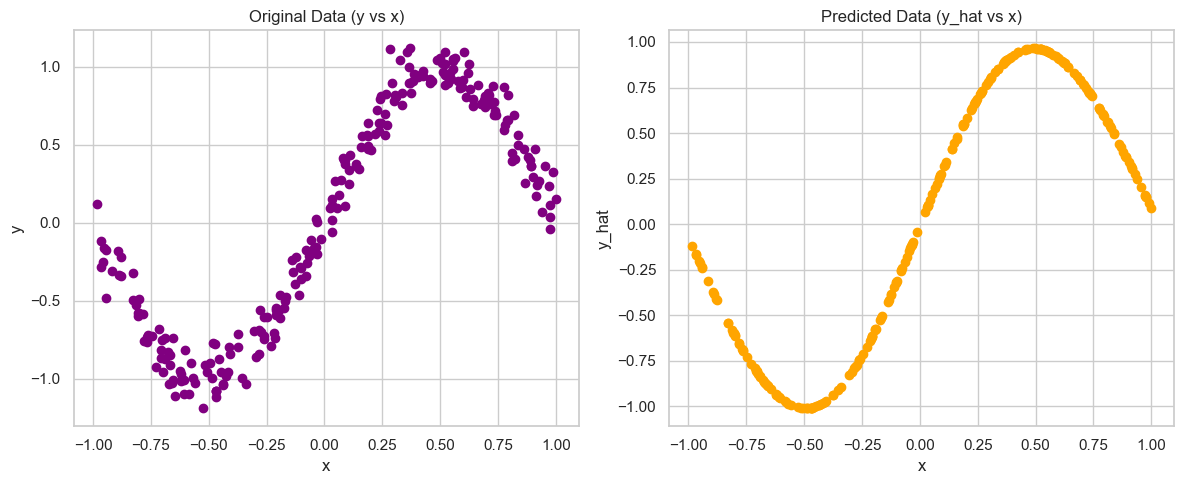

In [41]:
# Scatter plots
plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='purple')
plt.title("Original Data (y vs x)")
plt.xlabel("x")
plt.ylabel("y")

# Predictions
plt.subplot(1, 2, 2)
plt.scatter(X, y_pred_all, color='orange')
plt.title("Predicted Data (y_hat vs x)")
plt.xlabel("x")
plt.ylabel("y_hat")

plt.tight_layout()
plt.show()

##### The neural network successfully learned the underlying pattern in the data, achieving a final in-sample error (Ein) of 0.0802 after 1000 epochs. The predicted values closely follow the true distribution, as shown by the smooth approximation in the right plot, indicating the model’s ability to generalize complex nonlinear relationships.